# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**JS1 GROUP: Gift SS Nhlenyama, Nokuphila Simelane, Kgotatso Melvy Malapane, Paulina Kolobe, Bethuel Masango**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Model Evaluation</a>

<a href=#five>5. Model Selection</a>

<a href=#five>5. Model Tuning</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>


## 1. Importing Packages

In [ ]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Libraries for data preparation and model building


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = [...]


## 2. Loading the Data


* The dataset is split into the training data and test data and is loaded using pandas from csv files

In [74]:
# load the data
train = pd.read_csv("df_train.csv")
test = pd.read_csv("df_test.csv")
train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [ ]:
comb = pd.concat([train, test], axis=0).reset_index(drop=True) 

## 3. Exploratory Data Analysis (EDA)

1. We will begin by exploring the shape of our data, this includes:
    - Finding out the number of rows and columns
    - Obtaining the data types: what are the data types of columns, essentially,
      trying to understand how many features are numerical or categorical, the composition of our data.
2. We will split our data into numerical data and categorical data. We investigate relationships between the variables
   and relationships with the target variable by looking at the correlation of the data to the target variable and 
   each variable against another
3. We will perform statistical analysis on the data: and visualise distributions with histograms, density plots and scatter
   plot diagrams
         
  




In [4]:
train.shape

(8763, 49)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [7]:
#find out the number of each datatype in our data 
print(train.dtypes.value_counts())

float64    45
object      3
int64       1
dtype: int64


<AxesSubplot:>

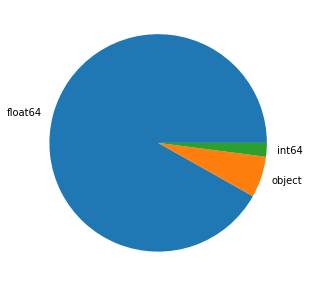

In [16]:
labels = 'float64', 'object', 'int64'
sizes = [45, 3, 1]
 
colors = ( "green", "greenyellow", "grey") 
fig1, ax1 = plt.subplots()
 
ax1.pie(sizes, colors = colors, labels=labels,autopct='%1.1f%%', shadow=True, startangle=45)
patches, texts, auto = ax1.pie(sizes, colors=colors, shadow=True, startangle=45, autopct='%1.1f%%' )
 
plt.legend(patches, labels, loc="best")
plt.show()

### The data composition

* A significant number of features are floating point variables 45/49
* 1 column is of an integer type. Both the float and integer columns constitute to numerical input features 1/49
  We will investigate the correlation of numerical feautures
* The are 3 input features that are categorical: Bar charts will help us understand the categories in each column

In [18]:
#seperate data into categorical and numerical data for easier data preparation
cat = ['time', 'Valencia_wind_deg', 'Seville_pressure']
num_data = train.drop(cat,axis=1) # numerical data
cat_data = train[cat]  # categorical data

#### Viewing Categorical Features

The dataset has 3 categorical features time,Valencia_wind_deg and Seville_pressure
Bar plots 

In [20]:
cat_data.head()

,time,Valencia_wind_deg,Seville_pressure
0,2015-01-01 03:00:00,level_5,sp25
1,2015-01-01 06:00:00,level_10,sp25
2,2015-01-01 09:00:00,level_9,sp25
3,2015-01-01 12:00:00,level_8,sp25
4,2015-01-01 15:00:00,level_7,sp25


C:\Users\nokph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Valencia_wind_deg')

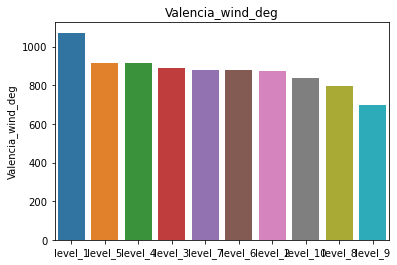

In [81]:
#bar plot ofplot categorical data
x=cat_data['Valencia_wind_deg'].value_counts().index
y=cat_data['Valencia_wind_deg'].value_counts()
ax.figure.set_size_inches(5,10)
sns.barplot(x,y).set_title('Valencia_wind_deg')



C:\Users\nokph\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

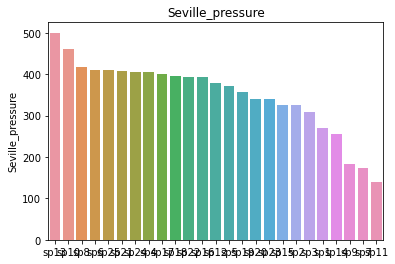

<Figure size 1080x576 with 0 Axes>

In [76]:
x=cat_data['Seville_pressure'].value_counts().index
y=cat_data['Seville_pressure'].value_counts()
sns.barplot(x,y).set_title('Seville_pressure')
plt.figure(figsize = (15,8))

In [95]:
dftime = cat_data.copy()
dftime['Date'] = dftime.time.apply(lambda x: str(x).split(" ")[0])
dftime['Hour'] = dftime.time.apply(lambda x: str(x).split(" ")[1].split(":")[0])
dftime['load_shortfall_3h'] = num_data['load_shortfall_3h']
df3 = pd.pivot_table(dftime, values='load_shortfall_3h', index='Date', columns='Hour')
df3

Hour,00,03,06,09,12,15,18,21
Date,,,,,,,,
2015-01-01,NaN,6715.666667,4171.666667,4274.666667,5075.666667,6620.666667,6842.000000,10760.333333
2015-01-02,10866.000000,-1850.333333,-4002.333333,-2893.000000,539.333333,65.000000,-1317.000000,5849.333333
2015-01-03,7125.333333,623.000000,-2679.333333,-1478.000000,2212.666667,145.000000,-2013.000000,2435.666667
2015-01-04,2806.333333,2710.000000,1281.333333,5200.000000,5179.333333,4187.333333,2845.333333,2350.000000
2015-01-05,4540.000000,6379.666667,7973.666667,1129.333333,3238.333333,NaN,NaN,5385.000000
...,...,...,...,...,...,...,...,...
2017-12-27,6170.333333,-3467.000000,-6292.666667,132.333333,7506.333333,6393.333333,6418.666667,9557.000000
2017-12-28,9013.666667,258.666667,-3311.666667,2792.666667,9291.000000,8421.666667,7050.000000,7720.666667
2017-12-29,7243.666667,1501.333333,-2451.333333,4482.000000,9859.666667,8431.666667,7714.000000,9286.333333


In [35]:
num_data.head()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [37]:
corr = num_data.corr()
s = corr.unstack()
sorted_pairs = s.sort_values(kind="quicksort", ascending=False)

In [43]:
#Data that is positively correlated to the target variable:load_shortfall_3h
pos = sorted_pairs['load_shortfall_3h'][sorted_pairs['load_shortfall_3h'] > 0]
print(pos.head(11))

load_shortfall_3h     1.000000
Valencia_temp_min     0.201863
Barcelona_temp_min    0.195984
Unnamed: 0            0.192612
Madrid_temp           0.186036
Barcelona_temp        0.182673
Madrid_temp_max       0.182548
Bilbao_temp_max       0.180934
Bilbao_temp           0.176411
Madrid_temp_min       0.174744
Seville_temp_min      0.174718
dtype: float64


<AxesSubplot:>

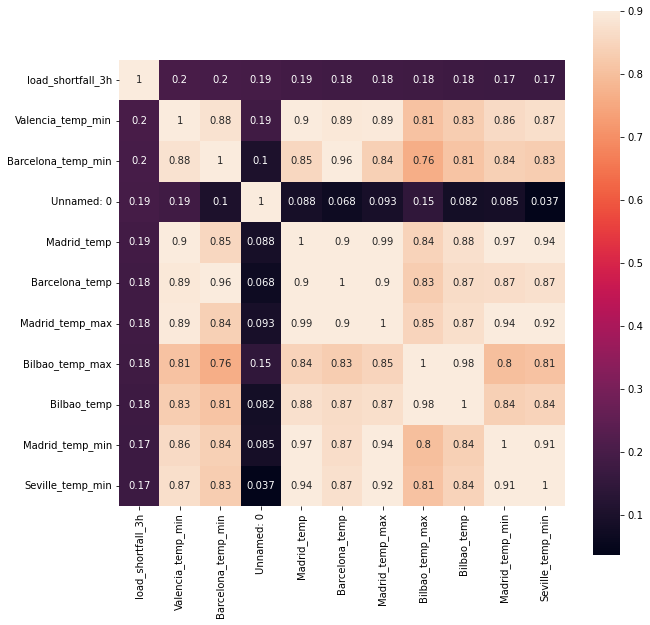

In [45]:
#positively correlated matrix
positive_corr_variables = ['load_shortfall_3h','Valencia_temp_min','Barcelona_temp_min','Unnamed: 0',           
'Madrid_temp',         
'Barcelona_temp',        
'Madrid_temp_max',       
'Bilbao_temp_max',       
'Bilbao_temp',           
'Madrid_temp_min',
'Seville_temp_min']
corrmat = num_data[positive_corr_variables].corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=.9, square=True, annot=True)

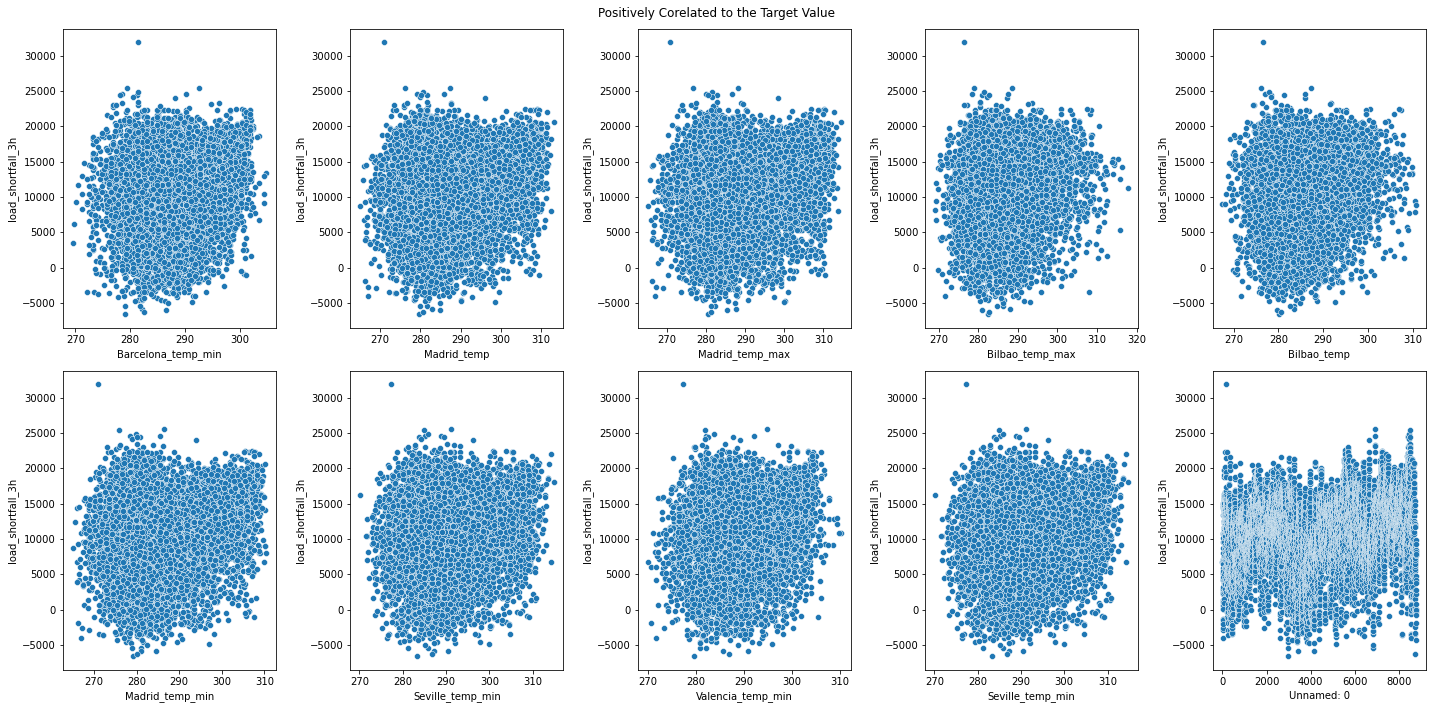

In [47]:
#scattter plots of positively correlated values
cols = ['load_shortfall_3h','Barcelona_temp_min','Unnamed: 0',           
'Madrid_temp',         
'Barcelona_temp',        
'Madrid_temp_max',       
'Bilbao_temp_max',       
'Bilbao_temp',           
'Madrid_temp_min',       
'Seville_temp_min'
]
fig, axs = plt.subplots(2, 5, figsize=(20,10))
sns.scatterplot(x=num_data['Barcelona_temp_min'], y=num_data['load_shortfall_3h'], ax=axs[0,0])
sns.scatterplot(x=num_data['Madrid_temp'], y=num_data['load_shortfall_3h'], ax=axs[0,1])
sns.scatterplot(x=num_data['Madrid_temp_max'], y=num_data['load_shortfall_3h'], ax=axs[0,2])
sns.scatterplot(x=num_data['Bilbao_temp_max'], y=num_data['load_shortfall_3h'], ax=axs[0,3])
sns.scatterplot(x=num_data['Bilbao_temp'], y=num_data['load_shortfall_3h'], ax=axs[0,4])
sns.scatterplot(x=num_data['Madrid_temp_min'], y=num_data['load_shortfall_3h'], ax=axs[1,0])
sns.scatterplot(x=num_data['Seville_temp_min'], y=num_data['load_shortfall_3h'], ax=axs[1,1])
sns.scatterplot(x=num_data['Valencia_temp_min'], y=num_data['load_shortfall_3h'], ax=axs[1,2])
sns.scatterplot(x=num_data['Seville_temp_min'], y=num_data['load_shortfall_3h'], ax=axs[1,3])
sns.scatterplot(x=num_data['Unnamed: 0'], y=num_data['load_shortfall_3h'], ax=axs[1,4])
fig.suptitle('Positively Corelated to the Target Value')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()


In [50]:
#Data that is negatively correlated to the target variable:load_shortfall_3h
neg_corr = sorted_pairs['load_shortfall_3h'][sorted_pairs['load_shortfall_3h'] < 0]
neg_corr

Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rain_1h         -0.027159
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Seville_rain_3h        -0.032945
Barcelona_pressure     -0.034385
Seville_wind_speed     -0.048433
Barcelona_rain_1h      -0.056633
Bilbao_wind_speed      -0.081602
Madrid_clouds_all      -0.081623
Seville_clouds_all     -0.091804
Barcelona_wind_speed   -0.103633
Barcelona_wind_deg     -0.116133
Bilbao_wind_deg        -0.120800
Bilbao_clouds_all      -0.127293
Valencia_wind_speed    -0.142791
Madrid_humidity        -0.150536
Madrid_wind_speed      -0.150981
Bilbao_rain_1h         -0.152510
Seville_humidity       -0.167290
dtype: float64

<AxesSubplot:>

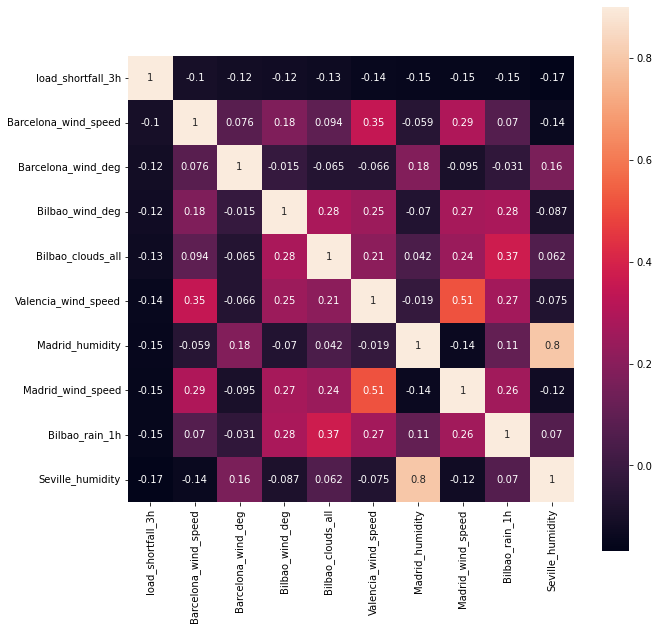

In [52]:
negative_corr_variables = ['load_shortfall_3h','Barcelona_wind_speed',
'Barcelona_wind_deg',
'Bilbao_wind_deg',
'Bilbao_clouds_all',
'Valencia_wind_speed',    
'Madrid_humidity',   
'Madrid_wind_speed',
'Bilbao_rain_1h',
'Seville_humidity']
corrmatneg = num_data[negative_corr_variables].corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmatneg, vmax=.9, square=True, annot=True)

In [ ]:
#scatter plot of negatively correlated data

In [55]:
sorted_pairs[46:].head(10)

Madrid_temp        Madrid_temp_max      0.988871
Madrid_temp_max    Madrid_temp          0.988871
Valencia_temp      Valencia_temp_max    0.987533
Valencia_temp_max  Valencia_temp        0.987533
Valencia_temp_min  Valencia_temp        0.985479
Valencia_temp      Valencia_temp_min    0.985479
Bilbao_temp_min    Bilbao_temp          0.982936
Bilbao_temp        Bilbao_temp_min      0.982936
Bilbao_temp_max    Bilbao_temp          0.981624
Bilbao_temp        Bilbao_temp_max      0.981624
dtype: float64

<AxesSubplot:xlabel='Bilbao_temp_max', ylabel='Bilbao_temp'>

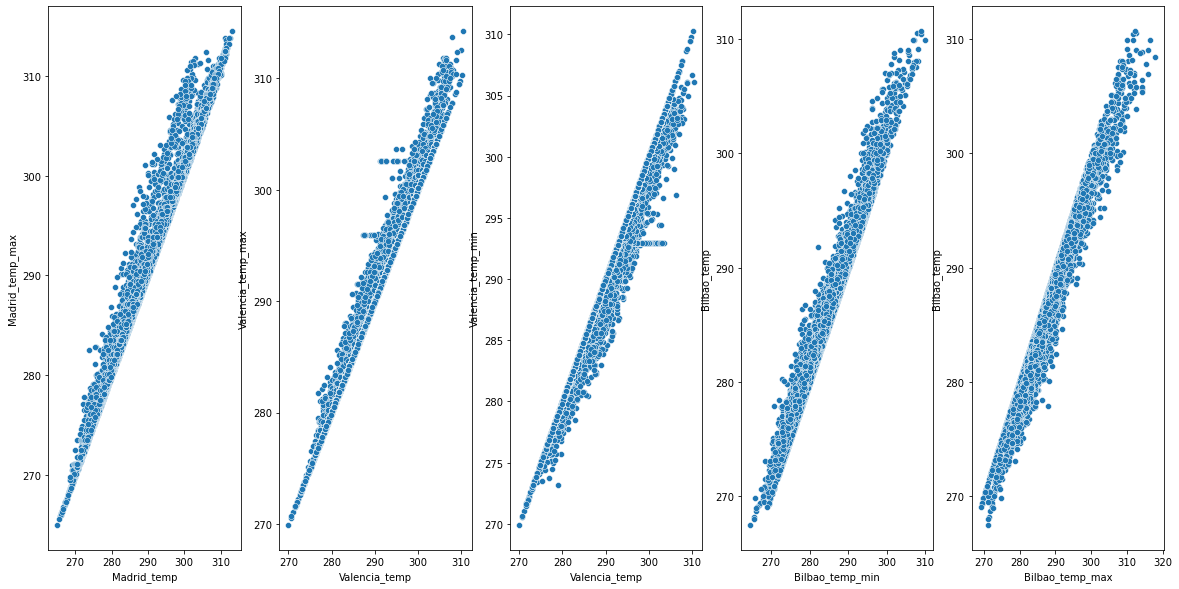

In [61]:
#Correlation between the temperature variables
fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(20,10))
sns.scatterplot(x=num_data['Madrid_temp'], y=num_data['Madrid_temp_max'], ax=ax0)
sns.scatterplot(x=num_data['Valencia_temp'], y=num_data['Valencia_temp_max'], ax=ax1)
sns.scatterplot(x=num_data['Valencia_temp'], y=num_data['Valencia_temp_min'], ax=ax2)
sns.scatterplot(x=num_data['Bilbao_temp_min'], y=num_data['Bilbao_temp'], ax=ax3)
sns.scatterplot(x=num_data['Bilbao_temp_max'], y=num_data['Bilbao_temp'], ax=ax4)


## Statistical Analysis

In [62]:
num_data.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [63]:
num_data.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

array([[<AxesSubplot:title={'center':'load_shortfall_3h'}>,
        <AxesSubplot:title={'center':'Valencia_temp_min'}>,
        <AxesSubplot:title={'center':'Barcelona_temp_min'}>],
       [<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Madrid_temp'}>,
        <AxesSubplot:title={'center':'Barcelona_temp'}>],
       [<AxesSubplot:title={'center':'Madrid_temp_max'}>,
        <AxesSubplot:title={'center':'Bilbao_temp_max'}>,
        <AxesSubplot:title={'center':'Bilbao_temp'}>],
       [<AxesSubplot:title={'center':'Madrid_temp_min'}>,
        <AxesSubplot:title={'center':'Seville_temp_min'}>,
        <AxesSubplot:>]], dtype=object)

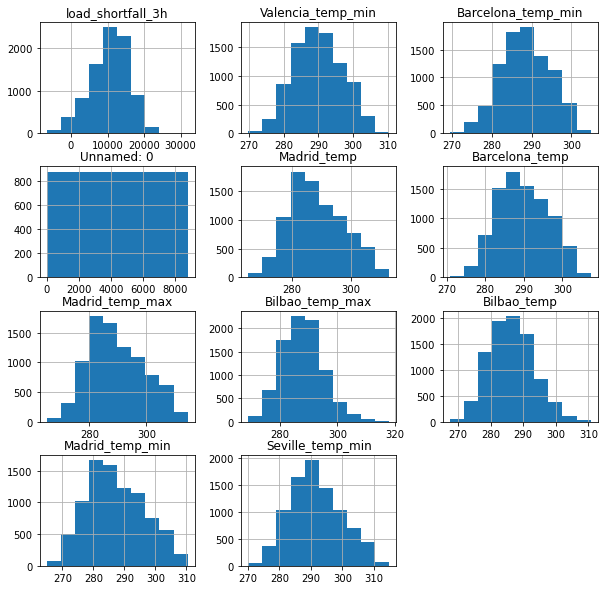

In [64]:
# plot relevant feature interactions
# histograms
#fighist, axs = plt.subplots(5, 10, figsize=(15,10))
num_data[positive_corr_variables].hist(figsize=(10,10))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

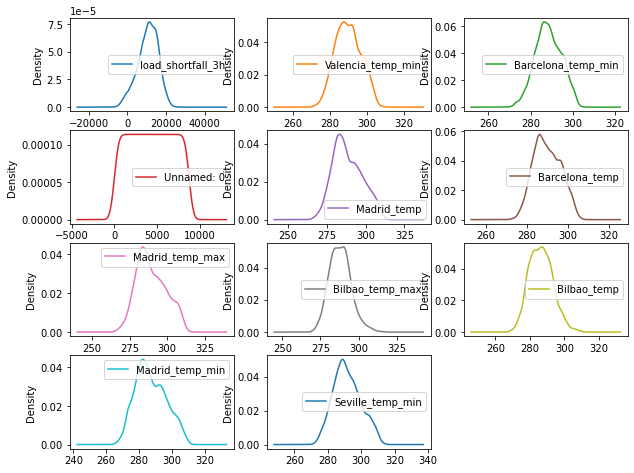

In [66]:
#2. Histogram for each Variable
num_data[positive_corr_variables].plot(kind='density', subplots=True, layout=(5, 3), sharex=False, figsize=(10, 10))

array([[<AxesSubplot:title={'center':'load_shortfall_3h'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_deg'}>],
       [<AxesSubplot:title={'center':'Bilbao_wind_deg'}>,
        <AxesSubplot:title={'center':'Bilbao_clouds_all'}>,
        <AxesSubplot:title={'center':'Valencia_wind_speed'}>],
       [<AxesSubplot:title={'center':'Madrid_humidity'}>,
        <AxesSubplot:title={'center':'Madrid_wind_speed'}>,
        <AxesSubplot:title={'center':'Bilbao_rain_1h'}>],
       [<AxesSubplot:title={'center':'Seville_humidity'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

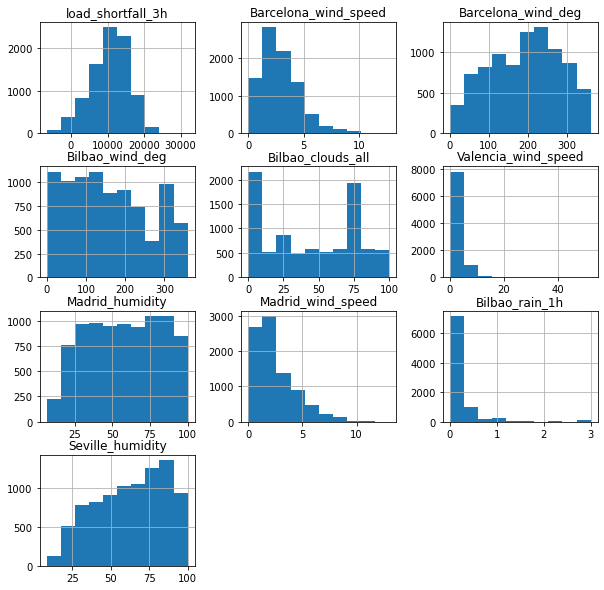

In [67]:
# plot relevant feature interactions
# histograms
#fighist, axs = plt.subplots(5, 10, figsize=(15,10))
num_data[negative_corr_variables].hist(figsize=(10,10))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

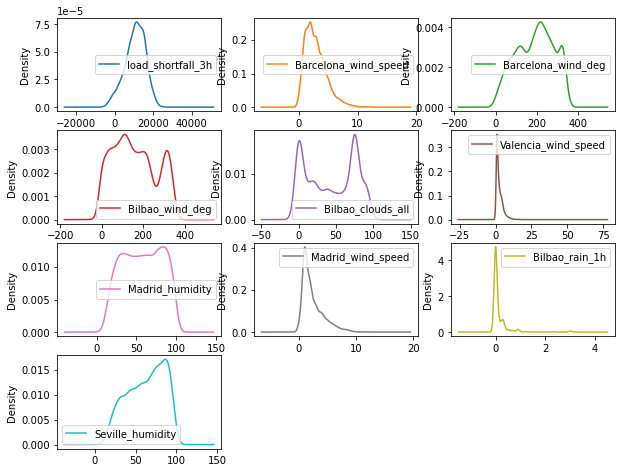

In [69]:
#2. Histogram for each Variable
num_data[negative_corr_variables].plot(kind='density', subplots=True, layout=(5, 3), sharex=False, figsize=(10, 10))

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# finding columns with missing values/ features
train.isnull().sum()

In [ ]:
# remove null values/ features
print(f'Train shape: {train.shape}  |  Test shape: {test.shape}')

train_null_values = train.Valencia_pressure.isna().sum()
print(f'Train data null Values: {train_null_values}  |   Percentage: {round(( train_null_values/ train.Valencia_pressure.shape[0]) *100, 2)}%')

In [ ]:
test_null_values = test.Valencia_pressure.isna().sum()
print(f'Test data null Values: {test_null_values}  |   Percentage: {round(( test_null_values / test.Valencia_pressure.shape[0]) *100, 2)}%')

In [ ]:
#replacing missing values in Valencia_pressure with the mean
mean = train['Valencia_pressure'].mean()
train['Valencia_pressure'].fillna(value = mean, inplace=True)
mean_t = test['Valencia_pressure'].mean()
test['Valencia_pressure'].fillna(value = mean_t, inplace=True)

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic